<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_sac_training_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fix Potential Library Conflicts
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-9' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 12.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,968 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,552 kB]
Get:13 https://developer.download.nvidia.com

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 182.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 171.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 50.9 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Immediately follow it with:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


TensorFlow GPU memory growth enabled


In [19]:
# === Imports ===
import os
import gc
import time
import json
import random
from datetime import datetime
from collections import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import yfinance as yf

from stable_baselines3 import SAC, PPO
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement



#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering Function
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            all_dfs.append(df_features)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
else:
    df = pd.DataFrame()
    print("No data available.")

if not df.empty:
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally to multi_stock_feature_engineered_dataset.csv")

    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to Google Drive at {drive_path}multi_stock_feature_engineered_dataset.csv")



Using device: cuda
📊 Dataset coverage check:
AAPL: 4933 rows | 2022-07-22 → 2025-05-22
TSLA: 4937 rows | 2022-07-22 → 2025-05-22
MSFT: 4933 rows | 2022-07-22 → 2025-05-22


KeyboardInterrupt: 

In [33]:
# === Imports ===
import os
import gc
import time
import torch
import pandas as pd
import numpy as np
from datetime import timedelta
from stable_baselines3 import SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box

# === Enable GPU Acceleration ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === Custom Environment ===
class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        if action < -0.3:
            discrete_action = 0
        elif action > 0.3:
            discrete_action = 1
        else:
            discrete_action = 2
        step_result = super().step(discrete_action)
        if len(step_result) == 5:
            obs, reward, terminated, truncated, info = step_result
        else:
            obs, reward, done, info = step_result
            terminated, truncated = done, False
        done = terminated or truncated
        price_diff = self.df.loc[self._current_tick, 'Close'] - self.df.loc[self._current_tick - 1, 'Close']
        reward += price_diff * discrete_action
        reward = np.clip(reward, -1.0, 1.0)
        return obs, reward, terminated, truncated, info

# === Configuration ===
test_mode = True
test_symbol = "AAPL"
test_timesteps = 2000
limit_symbols = 53
reduced_mode = True
resume_from_symbol = None
policy_kwargs = dict(net_arch=[32, 32])
batch_size = 256 if reduced_mode else 512
buffer_size = 50_000 if reduced_mode else 100_000
base_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# === Load Dataset ===
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    raise FileNotFoundError("Feature-engineered dataset not found!")

df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

# === Filter Symbols ===
filtered_symbols = df.groupby('Symbol').filter(lambda x: x['Volume'].mean() > 1_000_000)['Symbol'].unique()
symbols_to_run = [test_symbol] if test_mode else filtered_symbols[:limit_symbols]
if resume_from_symbol and resume_from_symbol in symbols_to_run:
    resume_index = symbols_to_run.index(resume_from_symbol)
    symbols_to_run = symbols_to_run[resume_index:]

# === Rolling Walkforward Parameters ===
train_days = 60
test_days = 10
frame_offset = 20
required_window = 5
min_test_len = frame_offset + required_window
performance_summary = []

for symbol in symbols_to_run:
    print(f"\n Processing {symbol}")
    df_symbol = df[df['Symbol'] == symbol].dropna(subset=['Close']).sort_values('Datetime').reset_index(drop=True)
    if df_symbol.empty:
        print(f" No data for {symbol}")
        continue

    start_date = df_symbol['Datetime'].min() + timedelta(days=train_days + test_days)
    end_date = df_symbol['Datetime'].max() - timedelta(days=test_days)
    walk_date = start_date
    window_count = 0

    while walk_date < end_date:
        train_start = walk_date - timedelta(days=(train_days + test_days))
        train_end = walk_date - timedelta(days=test_days)
        test_start = walk_date - timedelta(days=test_days)
        test_end = walk_date

        train_df = df_symbol[(df_symbol['Datetime'] >= train_start) & (df_symbol['Datetime'] < train_end)].copy()
        test_df = df_symbol[(df_symbol['Datetime'] >= test_start) & (df_symbol['Datetime'] < test_end)].copy()

        print(f" Raw train rows: {len(train_df)} | test rows: {len(test_df)}")

        train_df = train_df[base_columns].ffill().dropna().reset_index(drop=True)
        test_df = test_df[base_columns].ffill().dropna().reset_index(drop=True)

        print(f" After cleaning: {len(train_df)} train | {len(test_df)} test")

        if len(train_df) < frame_offset or len(test_df) < min_test_len:
            print(f" Skipping window {train_start.date()} → {test_end.date()} — test set too short for env (needs ≥ {min_test_len} rows)")
            walk_date += timedelta(days=test_days)
            continue

        print(f" Training: {train_start.date()} → {train_end.date()} | Rows: {len(train_df)}")
        print(f" Testing:  {test_start.date()} → {test_end.date()} | Rows: {len(test_df)}")
        window_count += 1

        try:
            frame_bound_train = (frame_offset, len(train_df))
            frame_bound_test = (frame_offset, len(test_df))

            env = DummyVecEnv([lambda: ContinuousTradingEnv(df=train_df, frame_bound=frame_bound_train, window_size=required_window)])
            eval_env = DummyVecEnv([lambda: Monitor(ContinuousTradingEnv(df=test_df, frame_bound=frame_bound_test, window_size=required_window))])

            model = SAC("MlpPolicy", env,
                        batch_size=batch_size,
                        buffer_size=buffer_size,
                        learning_rate=0.0003,
                        tau=0.005,
                        gamma=0.995,
                        action_noise=NormalActionNoise(mean=np.zeros(env.action_space.shape[-1]), sigma=0.2 * np.ones(env.action_space.shape[-1])),
                        train_freq=1,
                        gradient_steps=1,
                        verbose=0,
                        policy_kwargs=policy_kwargs,
                        device=device)

            timesteps = min(25000, len(train_df) * 10)
            print(f" Training for {timesteps} timesteps...")
            model.learn(total_timesteps=test_timesteps if test_mode else timesteps, callback=EvalCallback(eval_env))
            print(" Training complete.")

            obs = eval_env.reset()
            trade_log, buy_price, pnl, wins = [], None, 0, 0

            for i in range(len(test_df)):
                action, _ = model.predict(obs)
                obs, _, done, _ = eval_env.step(action)[:4]
                price = test_df['Close'].iloc[i]
                a_val = float(action.flatten()[0])
                if a_val > 0.3 and buy_price is None:
                    trade_log.append("BUY")
                    buy_price = price
                elif a_val < -0.3 and buy_price is not None:
                    profit = price - buy_price
                    if profit > 0.5:
                        pnl += profit
                        wins += 1
                        trade_log.append("SELL")
                        buy_price = None
                    else:
                        trade_log.append("HOLD")
                else:
                    trade_log.append("HOLD")
                if done[0]:
                    break

            test_df["SAC_Trade_Signal"] = trade_log + ["HOLD"] * (len(test_df) - len(trade_log))
            sharpe = (test_df['Close'].pct_change().mean() / test_df['Close'].pct_change().std()) * np.sqrt(252)
            accuracy = wins / trade_log.count("SELL") if trade_log.count("SELL") > 0 else 0
            drawdown = ((test_df['Close'].cummax() - test_df['Close']) / test_df['Close'].cummax()).max() * 100
            return_pct = ((test_df['Close'].iloc[-1] / test_df['Close'].iloc[0]) - 1) * 100
            final_value = test_df['Close'].iloc[-1]

            performance_summary.append({
                "Ticker": symbol,
                "Window_End": walk_date.strftime("%Y-%m-%d"),
                "Sharpe": round(sharpe, 4),
                "Accuracy": round(accuracy, 4),
                "Drawdown": round(drawdown, 2),
                "Return": round(return_pct, 2),
                "Final_Portfolio": round(final_value, 2)
            })

        except Exception as e:
            print(f" Walkforward failed for {symbol} @ {walk_date}: {e}")
        finally:
            for var in ['model', 'env', 'eval_env']:
                if var in locals():
                    del globals()[var]
            gc.collect()
            torch.cuda.empty_cache()

        walk_date += timedelta(days=test_days)

    print(f" {symbol}: {window_count} total walkforward windows evaluated.")

# === Save Results ===
if performance_summary:
    summary_df = pd.DataFrame(performance_summary)
    summary_df.to_csv("sac_walkforward_rolling_summary.csv", index=False)
    print("✔️ Walkforward evaluation complete. Results saved.")
else:
    print(" Walkforward completed, but no valid windows found. No results saved.")


Using device: cuda

 Processing AAPL
 Raw train rows: 287 | test rows: 56
 After cleaning: 287 train | 56 test
 Training: 2022-07-22 → 2022-09-20 | Rows: 287
 Testing:  2022-09-20 → 2022-09-30 | Rows: 56
 Training for 2870 timesteps...
 Training complete.
 Raw train rows: 301 | test rows: 42
 After cleaning: 301 train | 42 test
 Training: 2022-08-01 → 2022-09-30 | Rows: 301
 Testing:  2022-09-30 → 2022-10-10 | Rows: 42
 Training for 3010 timesteps...
 Training complete.
 Raw train rows: 287 | test rows: 56
 After cleaning: 287 train | 56 test
 Training: 2022-08-11 → 2022-10-10 | Rows: 287
 Testing:  2022-10-10 → 2022-10-20 | Rows: 56
 Training for 2870 timesteps...
 Training complete.
 Raw train rows: 294 | test rows: 49
 After cleaning: 294 train | 49 test
 Training: 2022-08-21 → 2022-10-20 | Rows: 294
 Testing:  2022-10-20 → 2022-10-30 | Rows: 49
 Training for 2940 timesteps...
 Training complete.
 Raw train rows: 294 | test rows: 49
 After cleaning: 294 train | 49 test
 Training: 20

In [34]:
import pandas as pd

df = pd.read_csv("sac_walkforward_rolling_summary.csv")
print(f"Rows loaded: {len(df)}")
print(df.head())


Rows loaded: 96
  Ticker  Window_End  Sharpe  Accuracy  Drawdown  Return  Final_Portfolio
0   AAPL  2022-09-30 -2.3663       1.0     10.24   -7.89           142.59
1   AAPL  2022-10-10 -0.6140       1.0      4.80   -1.50           140.08
2   AAPL  2022-10-20  0.9807       1.0      3.75    2.76           143.91
3   AAPL  2022-10-30  2.0804       1.0      5.12    7.02           155.71
4   AAPL  2022-11-09 -2.7343       0.0     12.42   -8.50           139.51



 Top 5 Sharpe:
   Ticker  Window_End  Sharpe  Return  Accuracy  Drawdown
65   AAPL  2024-07-11  6.6475    8.21       1.0      0.79
34   AAPL  2023-09-05  6.2382    5.38       1.0      0.56
41   AAPL  2023-11-14  4.2978    3.65       1.0      1.00
48   AAPL  2024-01-23  4.2231    6.08       1.0      1.22
60   AAPL  2024-05-22  4.1889    3.59       1.0      0.47

 Bottom 5 Sharpe:
   Ticker  Window_End  Sharpe  Return  Accuracy  Drawdown
57   AAPL  2024-04-22 -6.6777   -6.69       0.0      7.01
31   AAPL  2023-08-06 -4.0631   -7.13       0.0      7.37
92   AAPL  2025-04-07 -3.9448  -14.34       1.0     16.17
90   AAPL  2025-03-18 -3.3663   -6.28       0.0      8.24
84   AAPL  2025-01-17 -3.0084   -6.99       0.0      6.99


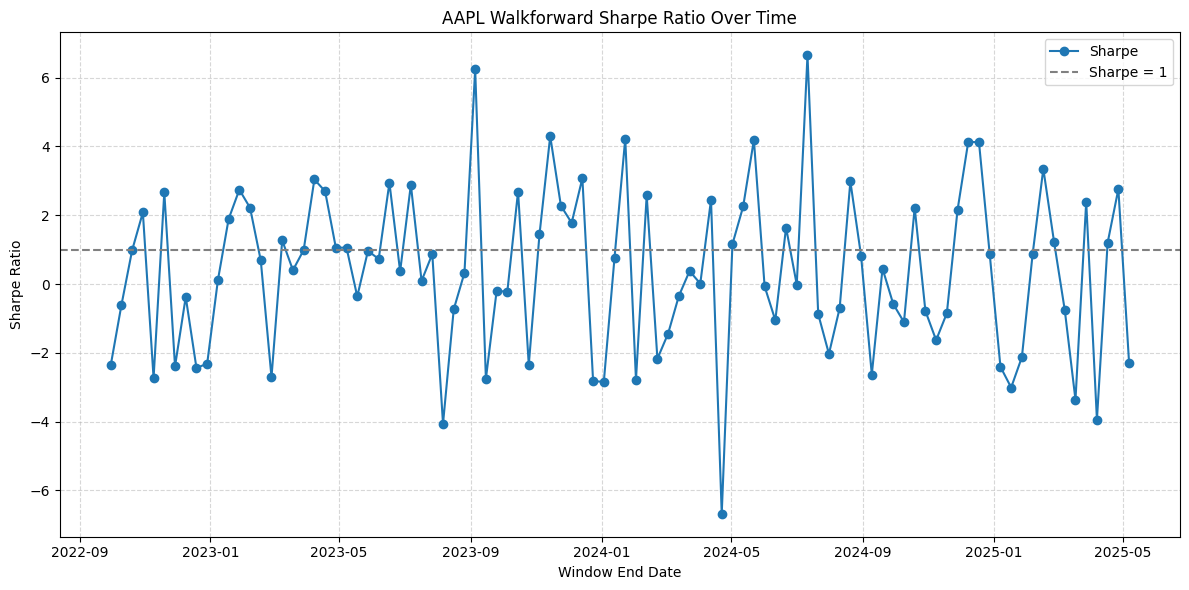

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

summary_path = "sac_walkforward_rolling_summary.csv"
if not os.path.exists(summary_path) or os.path.getsize(summary_path) == 0:
    raise ValueError("Results CSV is missing or empty. Run walkforward training first.")

df = pd.read_csv(summary_path)

if df.empty:
    raise ValueError("Loaded CSV is empty. No evaluation results were saved.")

# Top 5 Sharpe
top_sharpe = df.sort_values("Sharpe", ascending=False).head(5)
print("\n Top 5 Sharpe:")
print(top_sharpe[["Ticker", "Window_End", "Sharpe", "Return", "Accuracy", "Drawdown"]])

# Bottom 5 Sharpe
bottom_sharpe = df.sort_values("Sharpe", ascending=True).head(5)
print("\n Bottom 5 Sharpe:")
print(bottom_sharpe[["Ticker", "Window_End", "Sharpe", "Return", "Accuracy", "Drawdown"]])

# Plot example
plot_ticker = "AAPL"
df["Window_End"] = pd.to_datetime(df["Window_End"])
df_plot = df[df["Ticker"] == plot_ticker]

if df_plot.empty:
    print(f"No results for {plot_ticker} in summary.")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot["Window_End"], df_plot["Sharpe"], marker="o", label="Sharpe")
    plt.title(f"{plot_ticker} Walkforward Sharpe Ratio Over Time")
    plt.xlabel("Window End Date")
    plt.ylabel("Sharpe Ratio")
    plt.axhline(y=1.0, color="gray", linestyle="--", label="Sharpe = 1")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [30]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [38]:
!rm -rf /content/drive

In [39]:
import os
import pandas as pd

# === Mount Google Drive (if not already mounted) ===
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# === Save model selector results to Drive ===
model_output_dir = "/content/drive/MyDrive/Results_May_2025/results_sac_walkforward"
os.makedirs(model_output_dir, exist_ok=True)

# Format as selector-ready DataFrame
selector_df = pd.DataFrame(performance_summary)
selector_df = selector_df[["Ticker", "Sharpe", "Accuracy", "Drawdown", "Return", "Final_Portfolio"]]
selector_df["Model"] = "SAC"  # Add model label
selector_df = selector_df[["Ticker", "Model", "Sharpe", "Accuracy", "Drawdown", "Return", "Final_Portfolio"]]

# Save it
selector_df.to_csv(os.path.join(model_output_dir, "model_selector_ready.csv"), index=False)
print(" SAC model_selector_ready.csv saved to Google Drive.")


Mounted at /content/drive
 SAC model_selector_ready.csv saved to Google Drive.
